In [33]:
import pandas as pd

In [34]:
dcsdata = pd.read_table('DCSData.txt')
dcsdata.head()

,Date,Time,H2_Ratio,C4_Ratio,C_C2,F_C2,C_C4,F_C4,C_H2,F_H2,Temp,Press,Level
0,10/10/98,6:00:00,0.0059,0.0517,0.3634,2922.3832,0.0188,113.7634,0.0021,0.0666,90.0,30.3975,3.0
1,10/10/98,6:06:00,0.0059,0.0517,0.3634,2922.3832,0.0188,113.7634,0.0021,0.0666,90.0,30.3975,3.0
2,10/10/98,6:12:00,0.0059,0.0517,0.3634,2922.3832,0.0188,113.7634,0.0021,0.0666,90.0,30.3975,3.0
3,10/10/98,6:18:00,0.0059,0.0517,0.3634,2922.3832,0.0188,113.7634,0.0021,0.0666,90.0,30.3975,3.0
4,10/10/98,6:24:00,0.0059,0.0517,0.3634,2922.3832,0.0188,113.7634,0.0021,0.0666,90.0,30.3975,3.0


In [35]:
dcsdata['Date_Time'] = dcsdata.Date+' '+dcsdata.Time
dcsdata.Date_Time = pd.to_datetime(dcsdata.Date_Time)
dcsdata.set_index('Date_Time', inplace=True)
dcsdata.drop(['Date','Time'], axis=1, inplace=True)
dcsdata.head()

,H2_Ratio,C4_Ratio,C_C2,F_C2,C_C4,F_C4,C_H2,F_H2,Temp,Press,Level
Date_Time,,,,,,,,,,,
1998-10-10 06:00:00,0.0059,0.0517,0.3634,2922.3832,0.0188,113.7634,0.0021,0.0666,90.0,30.3975,3.0
1998-10-10 06:06:00,0.0059,0.0517,0.3634,2922.3832,0.0188,113.7634,0.0021,0.0666,90.0,30.3975,3.0
1998-10-10 06:12:00,0.0059,0.0517,0.3634,2922.3832,0.0188,113.7634,0.0021,0.0666,90.0,30.3975,3.0
1998-10-10 06:18:00,0.0059,0.0517,0.3634,2922.3832,0.0188,113.7634,0.0021,0.0666,90.0,30.3975,3.0
1998-10-10 06:24:00,0.0059,0.0517,0.3634,2922.3832,0.0188,113.7634,0.0021,0.0666,90.0,30.3975,3.0


In [36]:
labdata = pd.read_table('LabData.txt')
labdata.head()

,Date,Time,R_MI
0,10/10/98,6:00:00,0.2812
1,10/10/98,7:48:00,0.2896
2,10/10/98,9:48:00,0.3144
3,10/10/98,11:48:00,0.2973
4,10/10/98,13:48:00,0.2673


In [37]:
labdata['Date_Time'] = labdata.Date+' '+labdata.Time
labdata.Date_Time = pd.to_datetime(labdata.Date_Time)
labdata.set_index('Date_Time', inplace=True)
labdata.drop(['Date','Time'], axis=1, inplace=True)
labdata.head()

,R_MI
Date_Time,
1998-10-10 06:00:00,0.2812
1998-10-10 07:48:00,0.2896
1998-10-10 09:48:00,0.3144
1998-10-10 11:48:00,0.2973
1998-10-10 13:48:00,0.2673


In [38]:
alldata = pd.concat([labdata, dcsdata], axis=1)
alldata.head()

,R_MI,H2_Ratio,C4_Ratio,C_C2,F_C2,C_C4,F_C4,C_H2,F_H2,Temp,Press,Level
Date_Time,,,,,,,,,,,,
1998-10-10 06:00:00,0.2812,0.0059,0.0517,0.3634,2922.3832,0.0188,113.7634,0.0021,0.0666,90.0,30.3975,3.0
1998-10-10 06:06:00,NaN,0.0059,0.0517,0.3634,2922.3832,0.0188,113.7634,0.0021,0.0666,90.0,30.3975,3.0
1998-10-10 06:12:00,NaN,0.0059,0.0517,0.3634,2922.3832,0.0188,113.7634,0.0021,0.0666,90.0,30.3975,3.0
1998-10-10 06:18:00,NaN,0.0059,0.0517,0.3634,2922.3832,0.0188,113.7634,0.0021,0.0666,90.0,30.3975,3.0
1998-10-10 06:24:00,NaN,0.0059,0.0517,0.3634,2922.3832,0.0188,113.7634,0.0021,0.0666,90.0,30.3975,3.0


In [39]:
alldata.shape

(2302, 12)

In [40]:
alldata =alldata.dropna(axis=0, how='any')

In [41]:
import seaborn as sns
%matplotlib inline

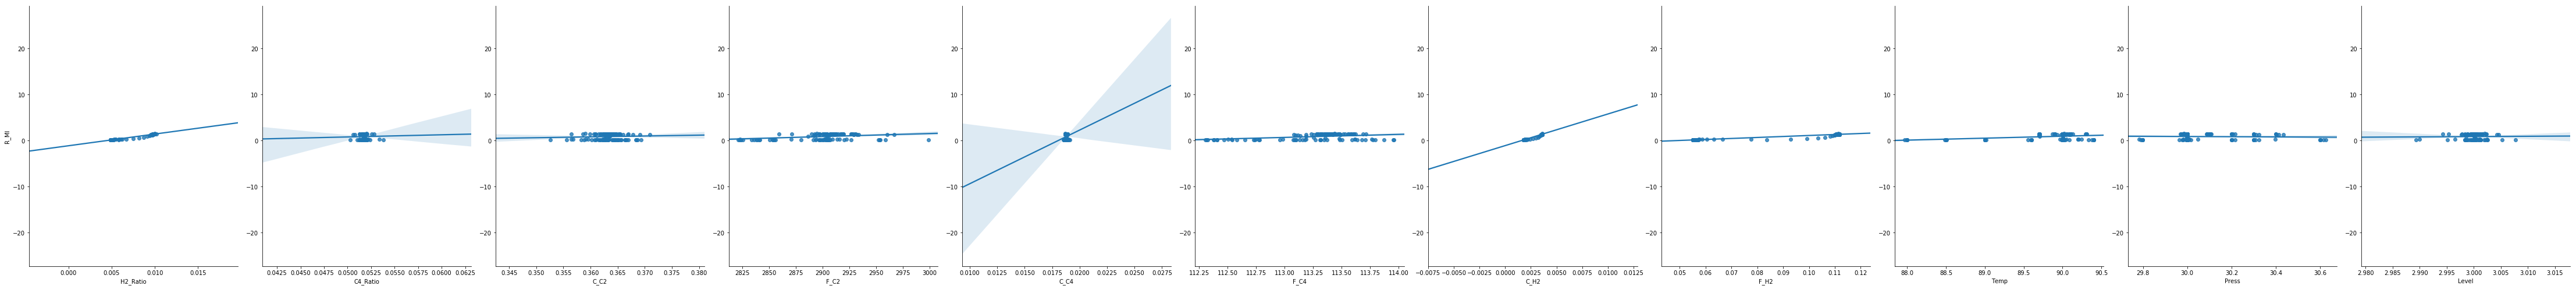

In [42]:
sns.pairplot(alldata, x_vars=['H2_Ratio', 'C4_Ratio', 'C_C2', 'F_C2', 'C_C4', 'F_C4', 'C_H2', 'F_H2', 'Temp', 'Press', 'Level'], y_vars='R_MI', size=7, aspect=0.8, kind='reg')

In [43]:
feature_cols = ['H2_Ratio', 'C4_Ratio', 'C_C2', 'F_C2', 'C_C4', 'F_C4', 'C_H2', 'F_H2', 'Temp', 'Press', 'Level']
X = alldata[feature_cols]
X.head()

,H2_Ratio,C4_Ratio,C_C2,F_C2,C_C4,F_C4,C_H2,F_H2,Temp,Press,Level
Date_Time,,,,,,,,,,,
1998-10-10 06:00:00,0.0059,0.0517,0.3634,2922.3832,0.0188,113.7634,0.0021,0.0666,90.0000,30.3975,3.0000
1998-10-10 07:48:00,0.0062,0.0534,0.3564,2823.1467,0.0190,113.6161,0.0022,0.0777,89.9667,30.0485,2.9900
1998-10-10 09:48:00,0.0061,0.0522,0.3568,2894.0236,0.0186,113.1866,0.0022,0.0631,90.2405,29.9819,3.0010
1998-10-10 11:48:00,0.0058,0.0516,0.3596,2909.5125,0.0186,112.9843,0.0021,0.0606,90.2077,30.0034,3.0024
1998-10-10 13:48:00,0.0055,0.0515,0.3612,2913.4502,0.0186,112.7498,0.0020,0.0588,90.2023,30.0080,3.0012


In [44]:
y = alldata['R_MI']
y.head()

Date_Time
1998-10-10 06:00:00    0.2812
1998-10-10 07:48:00    0.2896
1998-10-10 09:48:00    0.3144
1998-10-10 11:48:00    0.2973
1998-10-10 13:48:00    0.2673
Name: R_MI, dtype: float64

In [45]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [46]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(87, 11)
(87,)
(29, 11)
(29,)


In [47]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

-80.3367084576
[  5.03437642e+02   3.88839930e+01   3.48625773e+01  -4.46502436e-03
  -2.10844280e+02   1.23481401e-01   2.20469128e+02  -2.95466505e+01
   1.82966646e-01   1.48250263e-01   1.55354023e+01]


In [49]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

In [53]:
import numpy as np
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.0772587304341
